In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Activation,MaxPooling2D,Dense,Flatten

In [ ]:
data=[]
labels=[]
Parasitized=os.listdir("/content/drive/My Drive/Colab Notebooks/Dataset/cell_images/Parasitized/")
for a in Parasitized:
    try:
        image=cv2.imread("/content/drive/My Drive/Colab Notebooks/Dataset/cell_images/Parasitized/"+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((64, 64))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

Uninfected=os.listdir("/content/drive/My Drive/Colab Notebooks/Dataset/cell_images/Uninfected/")
for b in Uninfected:
    try:
        image=cv2.imread("/content/drive/My Drive/Colab Notebooks/Dataset/cell_images/Uninfected/"+b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((64, 64))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")

In [ ]:
Cells=np.array(data)
labels=np.array(labels)

In [ ]:
np.save("/content/drive/My Drive/Colab Notebooks/Cells64",Cells)
np.save("/content/drive/My Drive/Colab Notebooks/labels64",labels)

In [ ]:
Cells=np.load("/content/drive/My Drive/Colab Notebooks/Cells64.npy")
labels=np.load("/content/drive/My Drive/Colab Notebooks/labels64.npy")

In [ ]:
s=np.arange(Cells.shape[0])
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

In [ ]:
num_classes=len(np.unique(labels))
len_data=len(Cells)

In [ ]:
(x_train,x_test)=Cells[(int)(0.1*len_data):],Cells[:(int)(0.1*len_data)]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [ ]:
(y_train,y_test)=labels[(int)(0.1*len_data):],labels[:(int)(0.1*len_data)]

In [ ]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",input_shape=(64,64,3)))
model.add(Activation("relu"))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(5000))
model.add(Dense(2))
model.add(Activation("softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 32, 32, 64)       

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x = x_train, y = y_train,
                    epochs = 20, validation_data = (x_test,y_test),
                    verbose = 1)

Train on 24803 samples, validate on 2755 samples
Epoch 1/20
24803/24803 [==============================] - 98s 4ms/step - loss: 0.6896 - accuracy: 0.5851 - val_loss: 0.6756 - val_accuracy: 0.5641
Epoch 2/20
24803/24803 [==============================] - 92s 4ms/step - loss: 0.6588 - accuracy: 0.6102 - val_loss: 0.6451 - val_accuracy: 0.6160
Epoch 3/20
24803/24803 [==============================] - 92s 4ms/step - loss: 0.6280 - accuracy: 0.6534 - val_loss: 0.6411 - val_accuracy: 0.6352
Epoch 4/20
24803/24803 [==============================] - 92s 4ms/step - loss: 0.5708 - accuracy: 0.6952 - val_loss: 0.2010 - val_accuracy: 0.9325
Epoch 5/20
24803/24803 [==============================] - 92s 4ms/step - loss: 0.1727 - accuracy: 0.9454 - val_loss: 0.1557 - val_accuracy: 0.9452
Epoch 6/20
24803/24803 [==============================] - 92s 4ms/step - loss: 0.1459 - accuracy: 0.9535 - val_loss: 0.1617 - val_accuracy: 0.9561
Epoch 7/20
24803/24803 [==============================] - 92s 4ms/ste

In [ ]:
model.save("/content/drive/My Drive/Colab Notebooks/Microvggnet64/MicroVGGNet64.h5")

In [ ]:
from sklearn.metrics import confusion_matrix
pred = model.predict(x_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

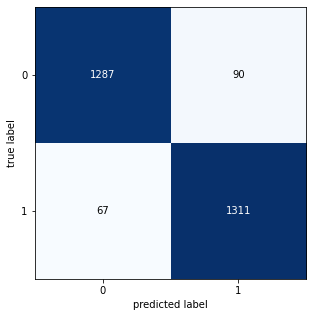

In [ ]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()